# Explore here

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

from math import ceil
import warnings

In [98]:
# Your code here

URL = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
raw_df = pd.read_csv(URL, sep=';')
raw_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [99]:
print(raw_df.info())
raw_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [100]:
raw_df = raw_df.drop_duplicates(ignore_index=True)
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [101]:
df = raw_df.copy()

num_continuous = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
num_discrete = ['age', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

for column in df.columns:
    if   column in (num_continuous):
        df[column] = df[column].astype('float32')
    elif column in (num_discrete):
        df[column] = df[column].astype('int32')

cat_num = {column: pd.factorize(df[column])[0] for column in categorical}
df[categorical] = pd.DataFrame(cat_num)



In [68]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int32  
 1   job             41164 non-null  float64
 2   marital         41164 non-null  float64
 3   education       41164 non-null  float64
 4   default         41164 non-null  float64
 5   housing         41164 non-null  float64
 6   loan            41164 non-null  float64
 7   contact         41164 non-null  float64
 8   month           41164 non-null  float64
 9   day_of_week     41164 non-null  float64
 10  duration        41176 non-null  int32  
 11  campaign        41176 non-null  int32  
 12  pdays           41176 non-null  int32  
 13  previous        41176 non-null  int32  
 14  poutcome        41164 non-null  float64
 15  emp.var.rate    41176 non-null  float32
 16  cons.price.idx  41176 non-null  float32
 17  cons.conf.idx   41176 non-null  floa

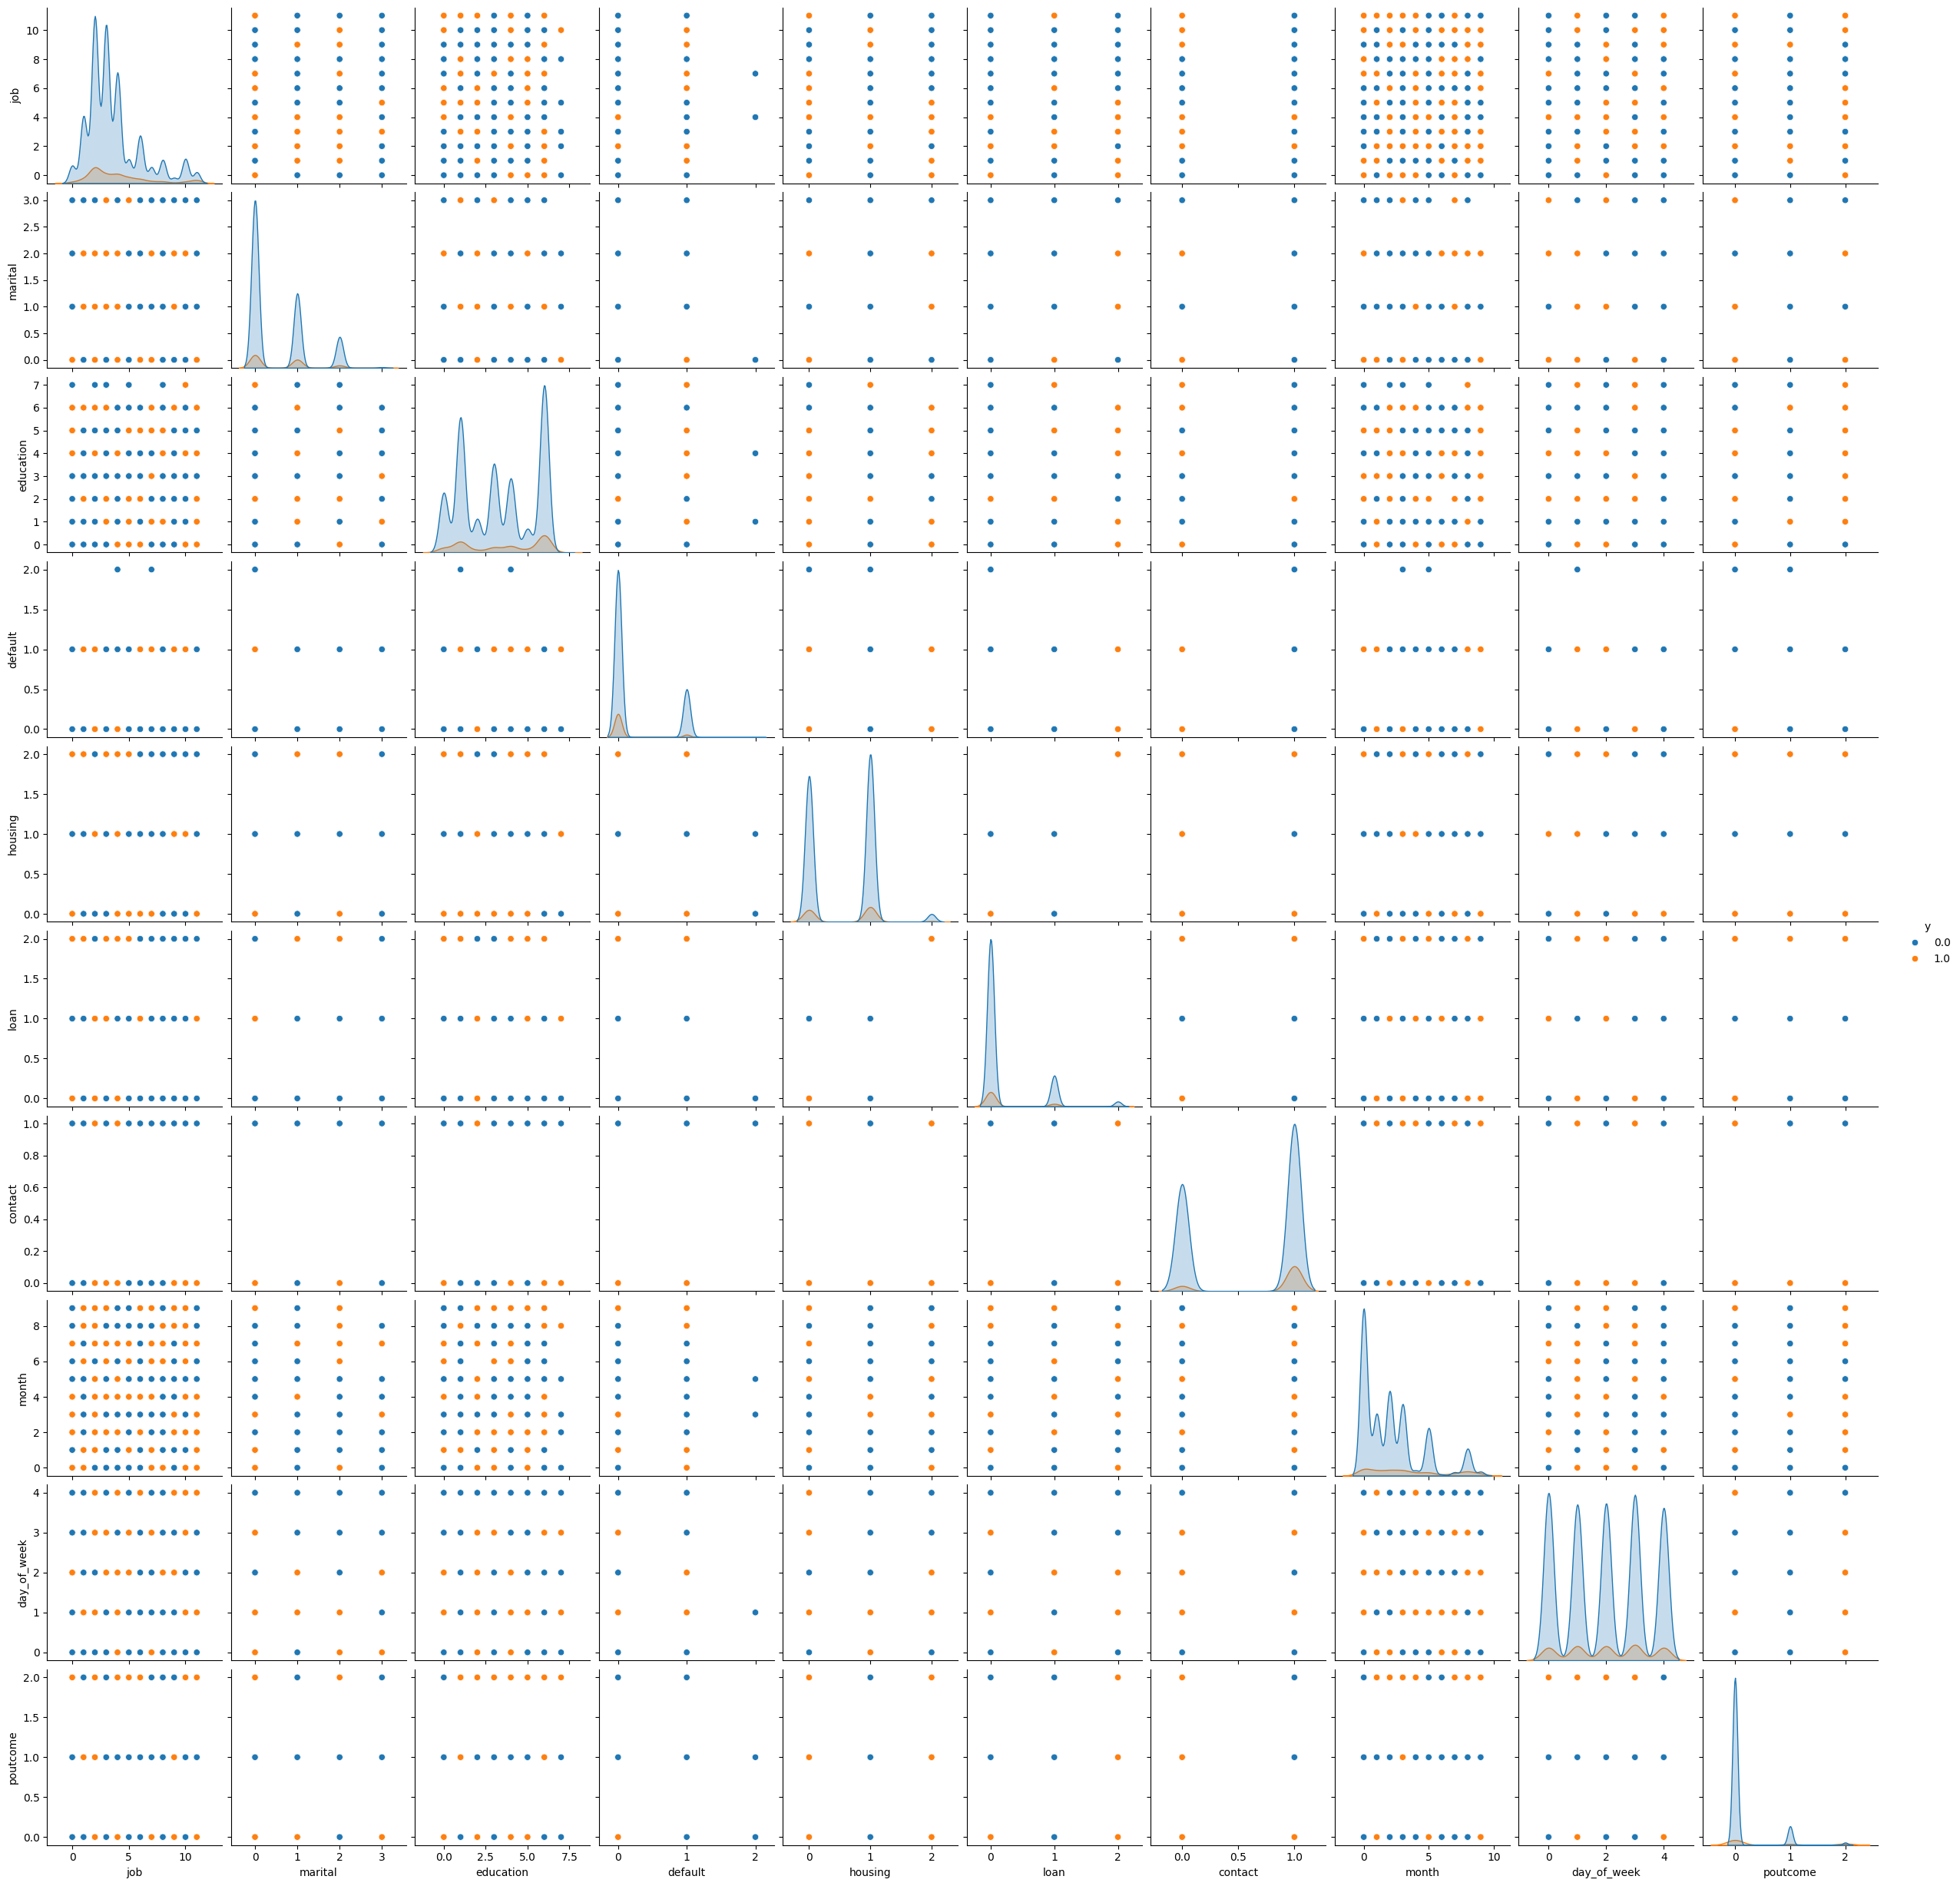

In [6]:
sns.pairplot(df[categorical], hue='y')

plt.show()

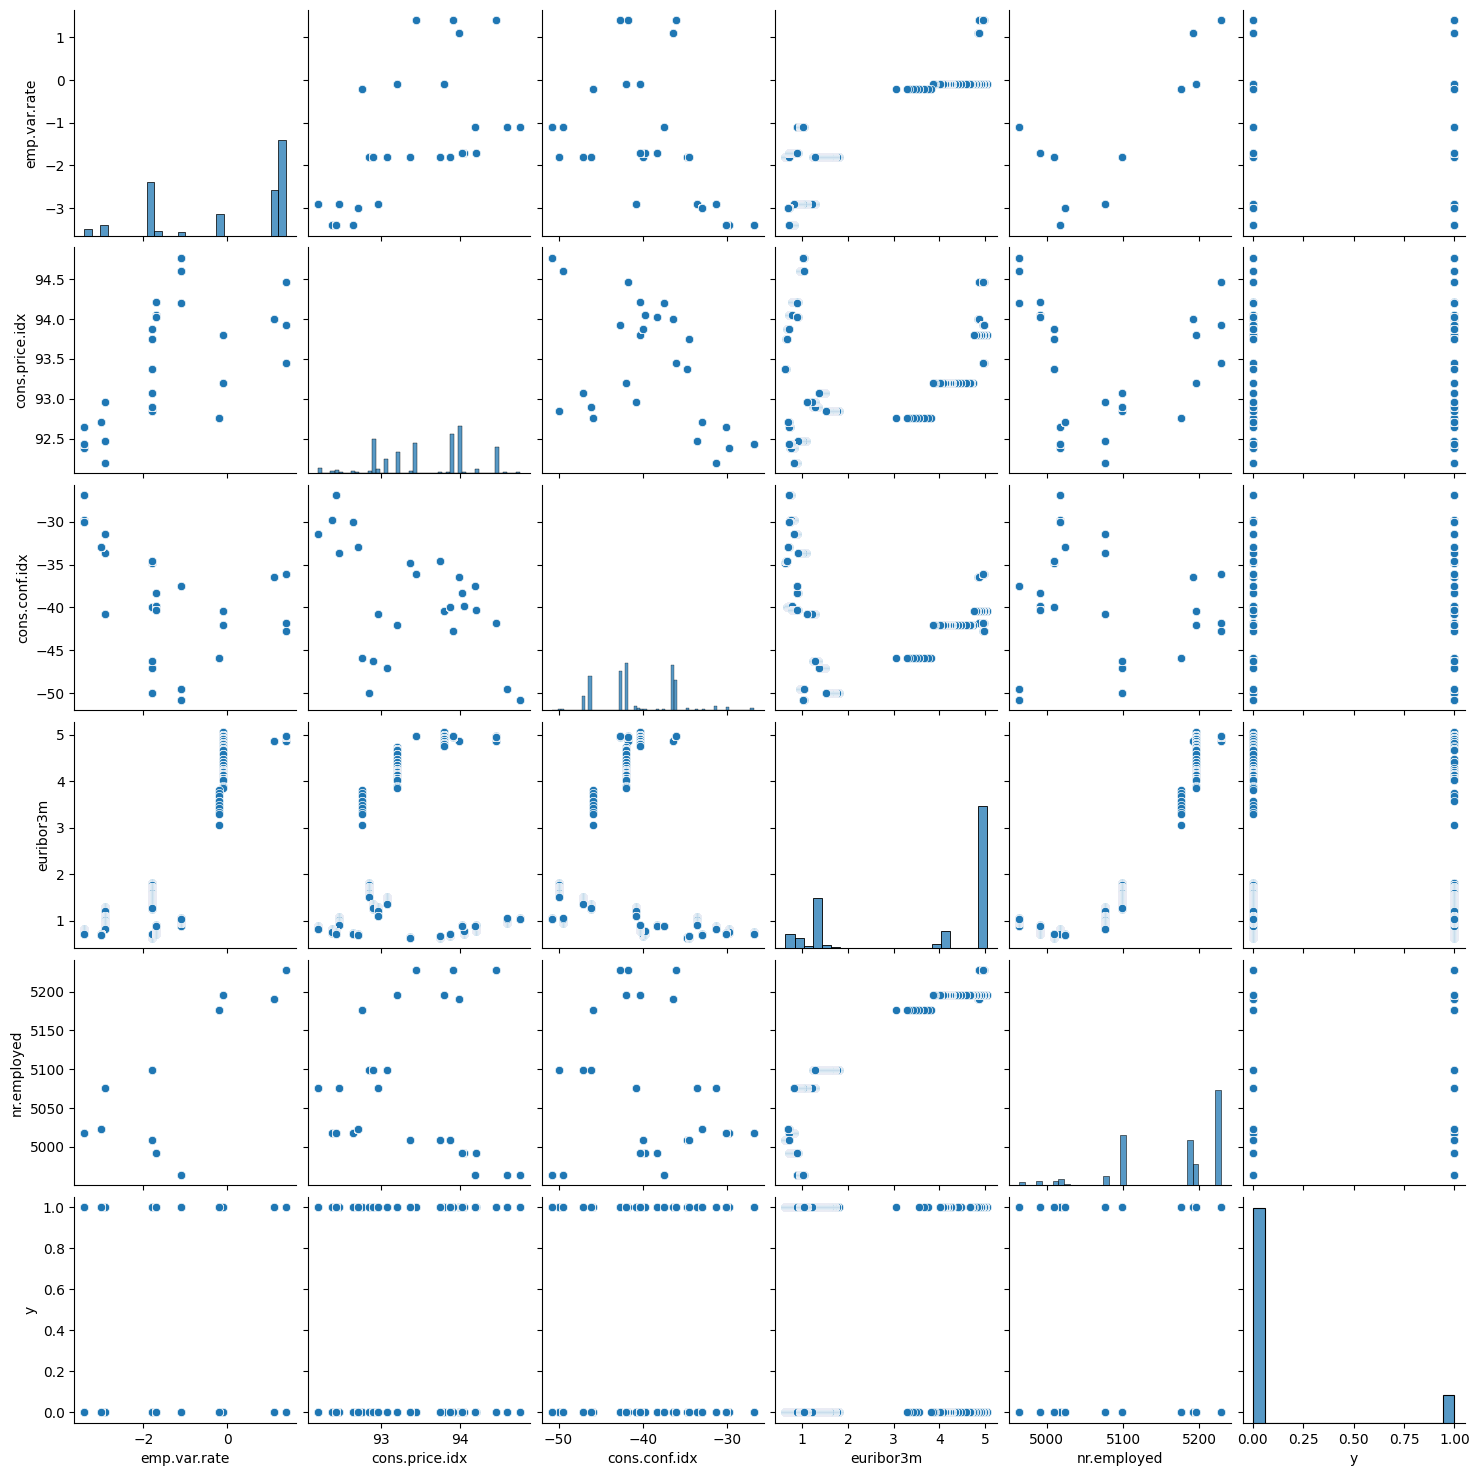

In [50]:
sns.pairplot(df[num_continuous+['y']])
plt.show()

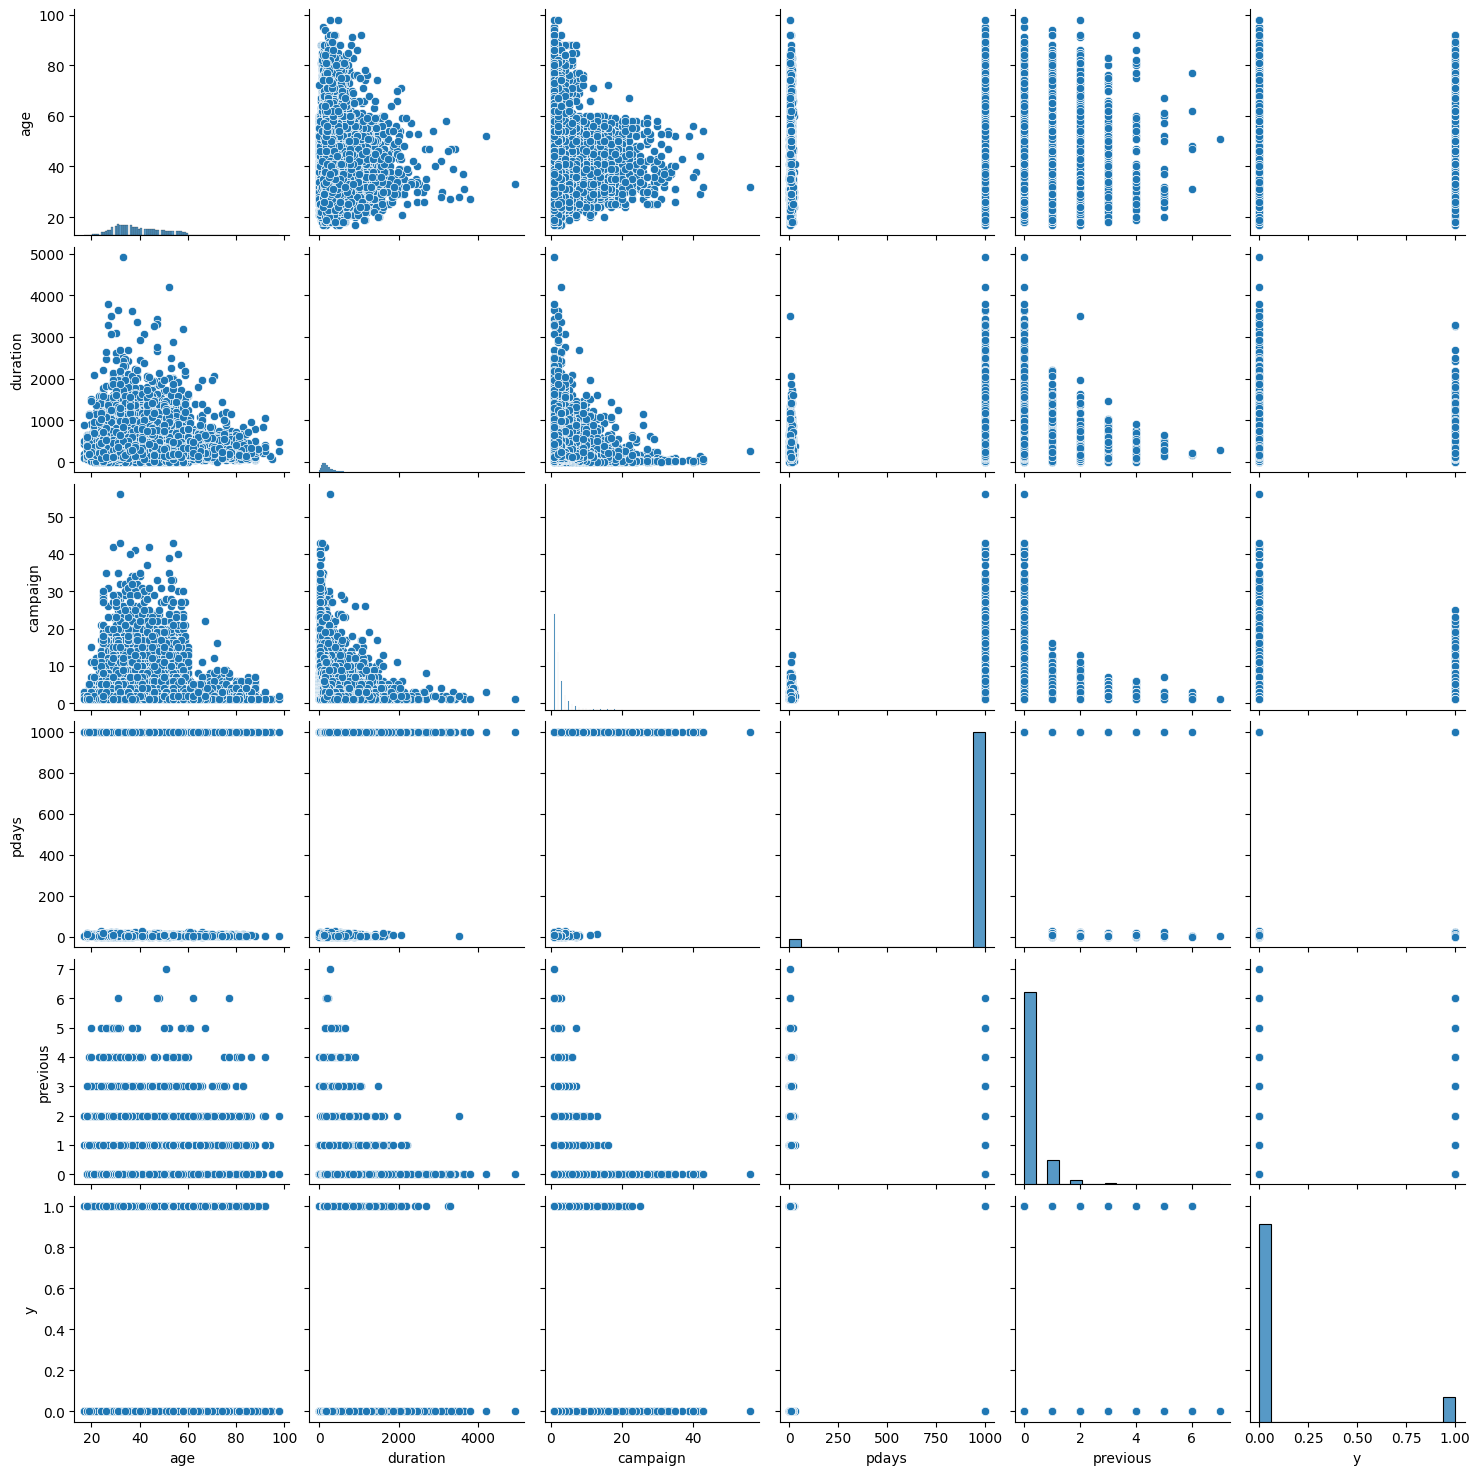

In [51]:
sns.pairplot(df[num_discrete+['y']])
plt.show()

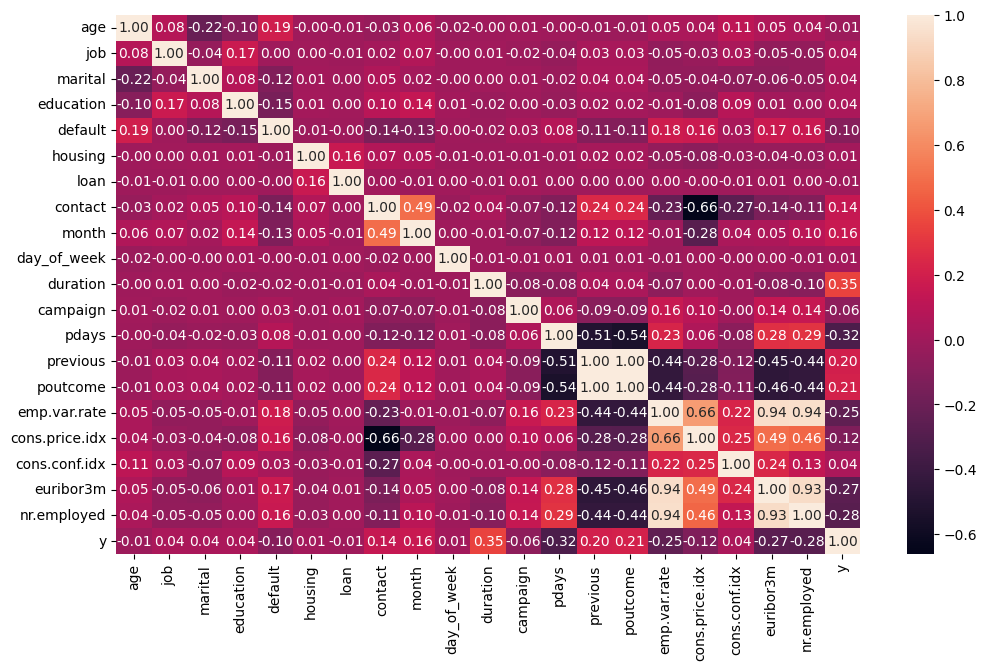

In [114]:
fig = plt.figure(figsize=(12,7))
sns.heatmap(df.corr('spearman'), annot=True, fmt='.2f')
plt.show()

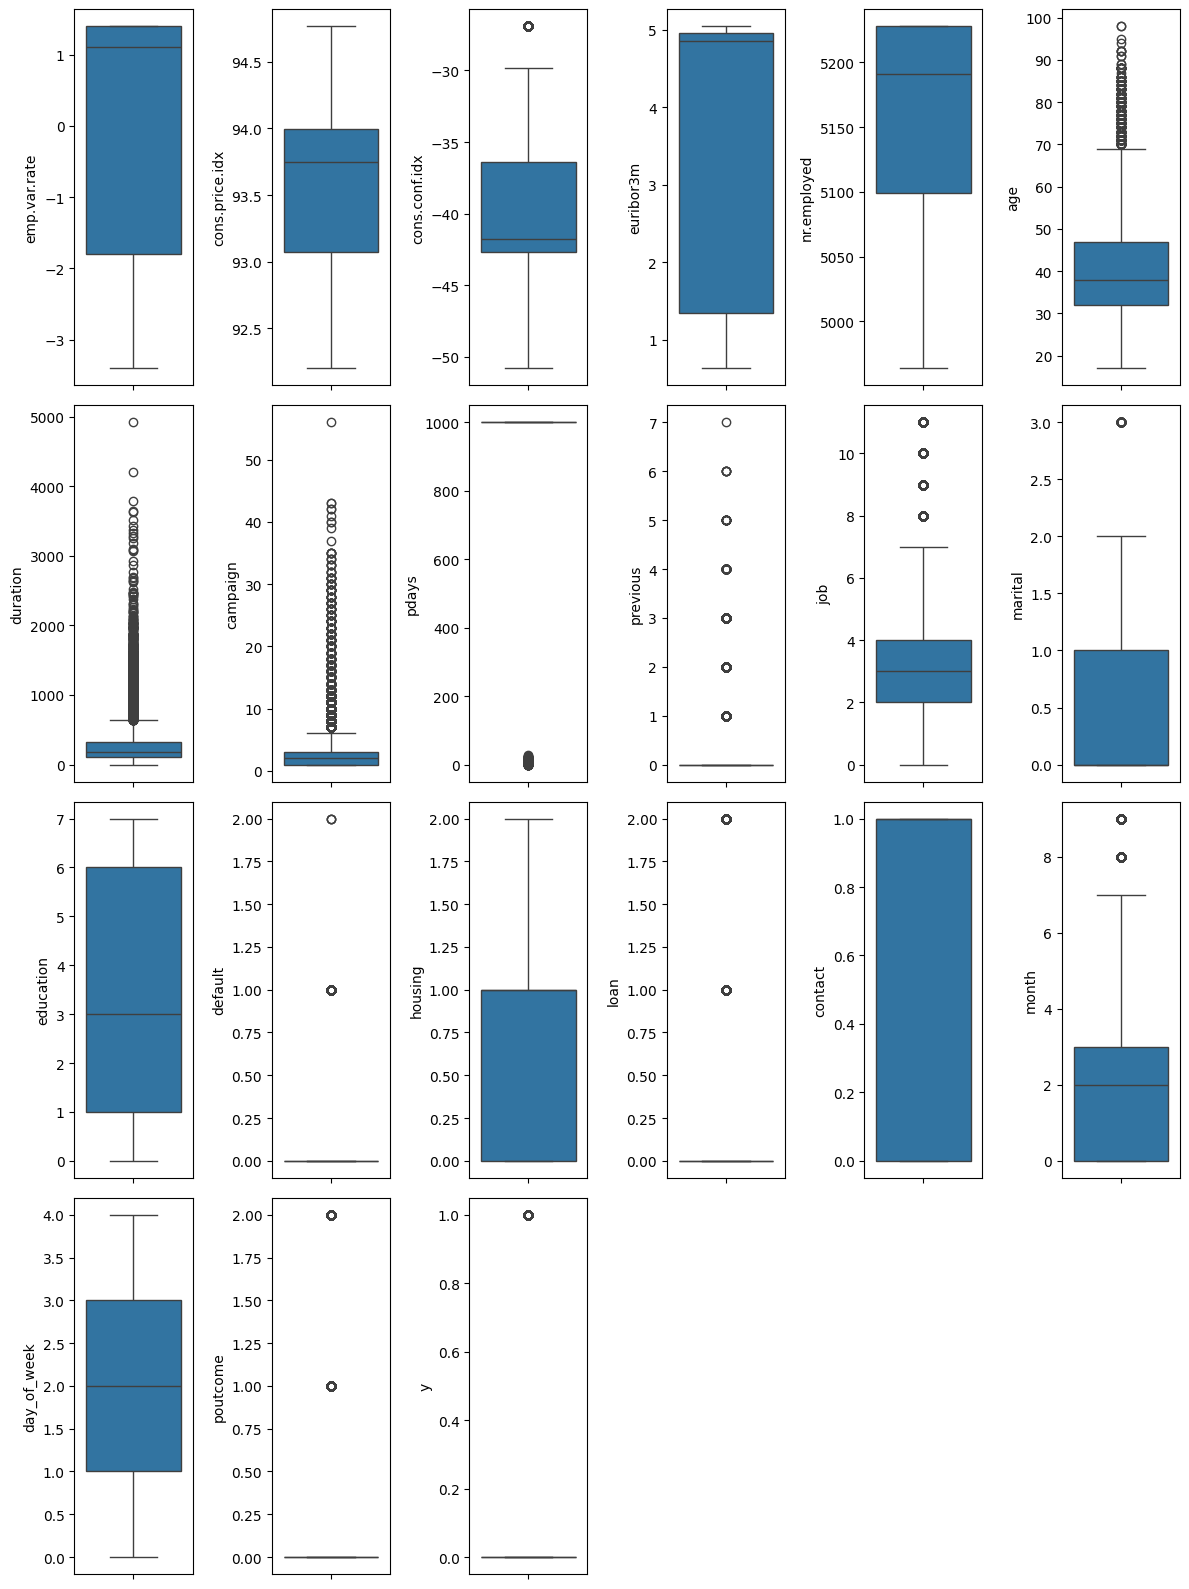

In [49]:
values_to_graph = num_continuous+num_discrete+categorical

ncols = 6
nrows = ceil(len(values_to_graph)/ncols)
sizein = 4
width = sizein*ncols*0.5
height = sizein*nrows

fig = plt.figure(figsize=(width,height))
ax=[]

for i, column in enumerate(values_to_graph):
    new_ax = fig.add_subplot(nrows,ncols,i+1)
    ax.append(new_ax)
    new_ax
    sns.boxplot(df[column],ax=ax[i])

plt.tight_layout()
plt.show()

In [109]:
x = df.drop('y',axis=1, inplace=False)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

scaled_x_train = pd.DataFrame(scaled_x_train,columns=x.columns,index=x_train.index)
scaled_x_test = pd.DataFrame(scaled_x_test,columns=x.columns,index=x_test.index)

scaled_x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12346,0.148148,0.909091,0.000000,0.285714,0.0,0.5,0.5,0.0,0.222222,1.00,0.058154,0.036364,1.0,0.0,0.0,1.000000,0.669135,0.338912,0.980503,1.000000
8564,0.407407,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.111111,0.50,0.036194,0.090909,1.0,0.0,0.0,1.000000,0.882306,0.376569,0.958966,1.000000
21417,0.148148,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.333333,0.25,0.020943,0.054545,1.0,0.0,0.0,1.000000,0.484413,0.615063,0.981410,1.000000
3315,0.222222,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.000000,0.75,0.027450,0.000000,1.0,0.0,0.0,0.937500,0.698755,0.602510,0.958059,0.859735
33236,0.283951,0.272727,0.333333,0.142857,0.5,0.0,0.0,1.0,0.000000,0.25,0.084994,0.000000,1.0,0.0,0.0,0.333333,0.269681,0.192469,0.148946,0.512287


In [ ]:
selection_model = SelectKBest(chi2,k=10)
selection_model.fit(scaled_x_train,y_train)
ix=selection_model.get_support()
x_train_selected = pd.DataFrame(selection_model.transform(scaled_x_train),columns=scaled_x_train.columns.values[ix])
x_test_selected = pd.DataFrame(selection_model.transform(scaled_x_test),columns=scaled_x_test.columns.values[ix])

print(x_train_selected.columns)

Index(['month', 'duration', 'previous', 'poutcome', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
model = LogisticRegression()
model.fit(X_train_sel,y_train)
y_pred = model.predict(X_test_sel)
accuracy_score(y_test,y_pred)

0.90165128703254

In [ ]:
def warn(*args,**kwargs):
    pass

hyperparams ={
    'C':[0.001,0.01,0.1,1],
    'penalty':['l1','l2','elasticnet',None],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

grid = GridSearchCV(model,hyperparams,scoring='accuracy',cv=5)
warnings.warn=warn

grid.fit(X_train_sel,y_train)

print(f'Adjusted hyperparameters: {grid.best_params_}')

Mejores hiperparametros (de la grilla): {'C': 1, 'penalty': None, 'solver': 'saga'}


In [118]:
adjusted_model = grid.best_estimator_
y_best_pred = adjusted_model.predict(X_test_sel)

accuracy_score(y_test,y_best_pred)

0.9021369596891695

In [127]:
from pickle import dump

model_filename = '../models/logistic_regression_C_{C}_penalty_{penalty}_solver_{solver}.sav'
dump(adjusted_model,open(model_filename.format(**grid.best_params_),'wb'))